#🖥 **Job Sheet 12: OCR with TOOLS**
####- **🌼Adinda Rahajeng Silvia Pranesti🌼**
###- **🌼2141720158 / 02**
###- **🌼3I-TI**

#**Lab Assignment**
##**To detect text orientation and script type**
This task aims to detect the orientation of text and the type of script used in an image using Tesseract.


Task:


1. Image Preparation:
- Use the provided sample image ('hitchhikers-rotated.png').
- Display the original image using Python and OpenCV
2. Orientation and Script Detection:
- Implement a Python script to detect the text orientation in the image.
- Use Tesseract to obtain the rotation angle and script type.
- Display the results of the orientation and script type


Image Preparation: Use the provided sample image ('hitchhikers-rotated.png'). Display the original image using Python and OpenCV. Orientation and Script Detection: Implement a Python script to detect the text orientation in the image. Use Tesseract to obtain the rotation angle and script type. Display the results of the orientation and script type

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 10 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 6s (747 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [2]:
import re #
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [6]:
IMG_DIR = 'images/'

**THE ANSWER FROM =**
1. Image Preparation:
- Use the provided sample image ('hitchhikers-rotated.png').
- Display the original image using Python and OpenCV

In [7]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

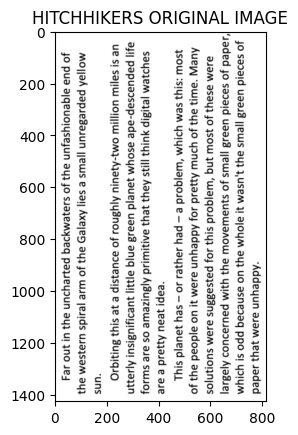

In [8]:
# Plot original image

image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('HITCHHIKERS ORIGINAL IMAGE')
plt.show()

**THE ANSWER FROM =**
2. Orientation and Script Detection:
- Implement a Python script to detect the text orientation in the image.
- Use Tesseract to obtain the rotation angle and script type.
- Display the results of the orientation and script type

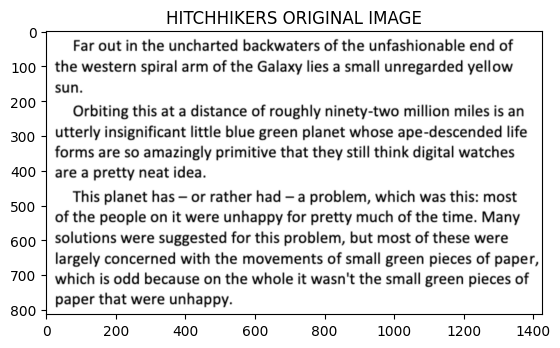

In [17]:
#ROTATE

rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated_image)
plt.title('HITCHHIKERS ORIGINAL IMAGE')
plt.show()

In [18]:
# get grayscale image
def get_grayscale(rotated_image):
    return cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(rotated_image):
    return cv2.medianBlur(rotated_image,5)

#thresholding
def thresholding(rotated_image):
    return cv2.threshold(rotated_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(rotated_image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(rotated_image, kernel, iterations = 1)

#erosion
def erode(rotated_image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(rotated_image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(rotated_image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(rotated_image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(rotated_image):
    return cv2.Canny(rotated_image, 100, 200)

#skew correction
def deskew(rotated_image):
    coords = np.column_stack(np.where(rotated_image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = rotated_image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(rotated_image, template):
    return cv2.matchTemplate(rotated_image, template, cv2.TM_CCOEFF_NORMED)

In [19]:
# Preprocess image

gray = get_grayscale(rotated_image) #grayscaling from original image
thresh = thresholding(gray) #thresholding bsed on gray image
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

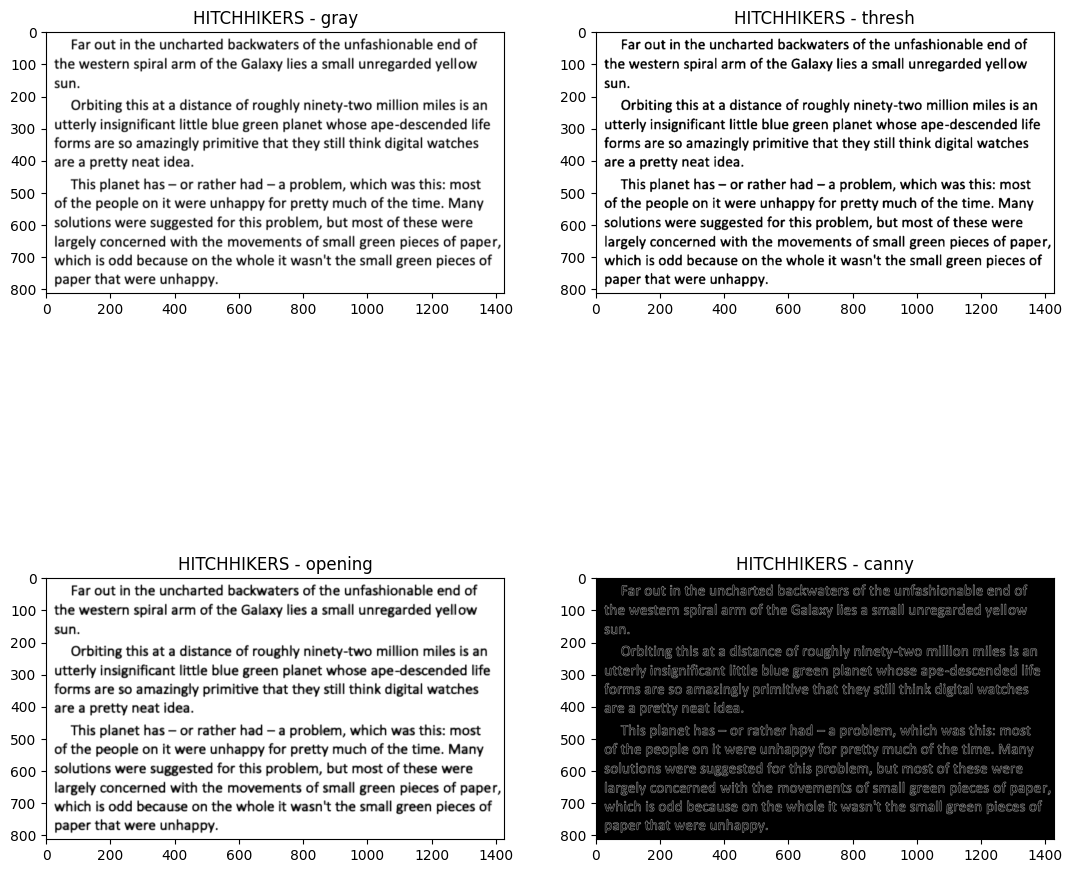

In [27]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('HITCHHIKERS - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [32]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(rotated_image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(rotated_image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(rotated_image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(rotated_image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
Far out in the 